<center><h2><b>14.The double pendulum</b></h2></center>
<center><h4>Exercise 8.15 from Computational Physics by Mark Newman</h4></center>
<center><h4>Code Author: Pratiksha Balasaheb Gaikwad</h4></center>
<hr style="height:2px;border-width:0;color:orange;background-color:orange">
<hr style="height:2px;border-width:0;color:blue;background-color:blue">


In [1]:
from IPython.display import Image
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt

**The double pendulum:**  A double pendulum has chaotic and unpredictable movement. It consists of a normal pendulum with another pendulum hanging from its end. For simplicity let us ignore friction, and assume that both pendulums have bobs of the same mass m and massless arms of the same length e.
Thus the setup looks like this:

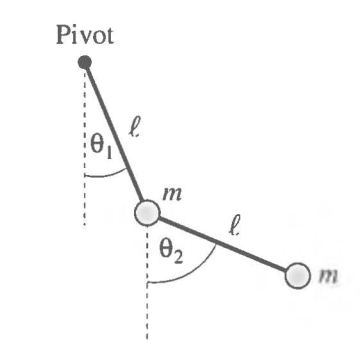

In [2]:
Image(filename='double pendulum.png', width=200)

The heights of the two bobs, measured from the level of the pivot are
$$h_1 = -lcos\theta_1, \quad h_2 = -l(cos\theta_1 + cos \theta_2),$$

which are nothing but the Y-coordinates of the position of the bobs.

The position of the bobs:

$$\begin{split}
(x_1,y_1) &=  (lsin\theta_1, -lcos\theta_1)\\
(x_1,y_1) &=  (lsin\theta_1+lsin\theta_2, -lcos\theta_1-lcos\theta_2) \end{split}$$

The total **Potential energy** of the double pendulum is then given by,

$$ V = mgh_1 + mgh_2 = -mgl(2cos\theta_1 + cos\theta_2)$$

The potential energy is negative because we have chosen to measure it downwards from the level of the pivot.

The velocities of the two bobs are given by

$$ v_1 = l\dot{\theta_1}, \quad v_2^2 = l^2[\dot{\theta_1}^2 + \dot{\theta_2}^2 + 2\dot{\theta_1}\dot{\theta_2}cos(\theta_1 - \theta_2)],$$

where $\dot{\theta}$ means the derivative of $\theta$ with respect to time $t$.

Then the total **Kinetic Energy** of the system is 

$$T = \frac{1}{2}mv_1^2 + \frac{1}{2}mv_2^2 = ml^2[\dot{\theta_1}^2 + \frac{1}{2}\dot{\theta_2}^2 + \dot{\theta_1}\dot{\theta_2}cos(\theta_1 - \theta_2)]$$

Therefore, the **Total Energy** of the system is,

$$ \begin{split}E &= T + V\\ &= -mgl(2cos\theta_1 + cos\theta_2) + ml^2[\dot{\theta_1}^2 + \frac{1}{2}\dot{\theta_2}^2 + \dot{\theta_1}\dot{\theta_2}cos(\theta_1 - \theta_2)]\end{split}$$

*The codes are adopted from HW solutions and then modified as per the requirements. 

In [3]:
def f(r, **kwargs):
    """
    Function defining system of eqns of motion for a pendulum
    
    Inputs: r -- 2D vector w/ elems theta (angle) 
                 and omega (angular velocity)
    Returns: 2D array of functions f(theta) and f(omega) 
             evaluated at these points
    """
    
    th1, th2 = r[0], r[1]
    w1, w2 = r[2], r[3]

    fth1 = w1
    fth2 = w2
    
    fw1 = -(w1**2*sin(2*th1-2*th2) + 2*w2**2*sin(th1-th2) + (g/l)*(sin(th1-2*th2) + 3*sin(th1)))/(3-cos(2*th1-2*th2))
    fw2 = (4*w1**2*sin(th1-th2) + w2**2*sin(2*th1 - 2*th2) + 2*(g/l)*(sin(2*th1-th2)-sin(th2)))/(3-cos(2*th1-2*th2))

    return np.array([fth1, fth2,fw1,fw2], float)
    

In [4]:
def RK4(t0, t1, h, th10, th20, w10, w20, f):
    
        """                                                                                                                                                                                                      
        Calculate a solution to a system of first-order ODEs                                                                                                                                                     

        Uses the fourth-order Runge-Kutta method.                                                                                                                                                                
        Eqns are assumed to be of the (vector) form rs'(t)=f(r,t).                                                                                                                                                
        Inputs: f (pre-defined function), 
                t0 & t1 (Initial & final time), 
                th10, th20 (=theta_1(t0), theta_2(t0)),
                w10, w20 (=w_1(t0), theta_2(t0)),
                
                h (step size)                                                                                                                                       
        Returns: t and rs (both arrays of size N=#steps)                                                                                                                                                          
        """

        N = (t1 - t0)/h
        
        print("Step-size = ", h)
        print(f"Number of steps = {N:.0f}")
        ts = np.arange(t0, t1+h,h)
        r = np.array([th10, th20, w10, w20], float)
        rs = np.array([r])
        
        for t in ts[:-1]:
            k1 = h*f(r)
            k2 = h*f(r + 0.5*k1)
            k3 = h*f(r + 0.5*k2)
            k4 = h*f(r + k3)
            r += (k1 + 2*k2 + 2*k3 + k4)/6
            
            rs = np.append(rs, np.array([r]), axis=0)

        return ts, rs

In [5]:
def get_coord(rs):
    '''
    Calculate the (x,y) coordinates of both bobs.
    
    Inputs: 
    rs : array of thetas and omegas of both bobs
    
    Outputs:
    x,y coordinates of both bobs, respectively
    '''
    th1 = rs[:,0]
    th2 = rs[:,1]

    x1 =  l*sin(th1)
    y1 = -l*cos(th1)
    x2 =  l*(sin(th1) + sin(th2))
    y2 = -l*(cos(th1) + cos(th2))
    
    return x1,y1, x2, y2


In [6]:
def get_vel_sq(rs):
    '''
    Calculate the square of velocities of both bobs.
    
    Inputs: 
    rs : array of thetas and omegas of both bobs
    
    Outputs:
    square of velocity of both bobs, respectively
    '''
    
    th1 = rs[:,0]
    th2 = rs[:,1]
    w1 = rs[:,2]
    w2 = rs[:,3]

    v1_sq = (l*w1)**2
    v2_sq = l**2*(w1**2 + w2**2 + 2*w1*w2*cos(th1-th2))
    return v1_sq, v2_sq
    

In [7]:
def get_PE(rs):
    ''''
    Returns the potential energy the system given the
    Input rs : array of thetas and omegas of both bobs
    '''
    
    th1 = rs[:,0]
    th2 = rs[:,1]
    pe = -m*g*l*(2*cos(th1) + cos(th2))
    return pe

In [8]:
def get_KE(v1_sq, v2_sq):
    ''''
    Returns the kinetice energy the system given the
    Input rs : array of thetas and omegas of both bobs
    '''
    ke = 0.5*m*(v1_sq + v2_sq)
    return ke

In [9]:
def get_totE(pe, ke):
    ''''
    Returns the total energy the system given the
    potential and kinetic energy.
    '''
    return (pe+ke)

In [10]:
def double_pendulum(th10, th20, w10, w20, verbose="True"):
    '''
    Function defines the initial conditions and call the functions
    to obtain various properties of double pendulum.
    
    If verbose == 'True', it prints various plots.
    '''
    t0 = 0       #Initial time
    t1 = 100     #Final time
    h = 0.0015   #Step-size
    
    # Printing initial conditions
    print("\nInitial Conditions")
    print(f"(\u03B8\u2081, w\u2081) = ({th10:.2f},{w10})")
    print(f"(\u03B8\u2082, w\u2082) = ({th20:.2f},{w20})\n")
    
    # Function call to solve ODEs using RK4 method
    ts,rs = RK4(t0, t1, h, th10, th20, w10, w20,f)
    #print(rs.shape)
    
    # Unfold the output array of solutions 
    th1 = rs[:,0]
    th2 = rs[:,1]
    w1 = rs[:,2]
    w2 = rs[:,3]
    
    v1_sq, v2_sq = get_vel_sq(rs)
    x1, y1, x2, y2 = get_coord(rs)
    PE = get_PE(rs)
    KE = get_KE(v1_sq, v2_sq)
    tot_E = get_totE(PE, KE)

    # Calculate difference b/w initial & final total energy
    difE = tot_E[0] - tot_E[-1]
    # Variation in total energy values
    varE = max(tot_E)-min(tot_E)

    print(f"\ninitial totE - final totE =  {difE:.4e} J")
    print(f"max_totE - min_totE = {varE:.4e} J")
    
    if verbose == "True":
        fig = plt.figure(figsize=(10,10))
        plt.subplot(321)
        plt.plot(x1,y1)
        plt.xlabel('x1 (m)'), plt.ylabel('y1 (m)')
        plt.title("Motion of 1st Bob")

        plt.subplot(322)
        plt.plot(x2,y2)
        plt.xlabel('x2 (m)'), plt.ylabel('y2 (m)')
        plt.title("Motion of 2nd Bob")

        
        plt.subplot(323)
        plt.plot(ts,th1)
        plt.xlabel('t (s)'), plt.ylabel('\u03B8\u2081 (rad)')
        plt.title("Evolution of \u03B8\u2081")

        plt.subplot(324)
        plt.plot(ts,th2)
        plt.xlabel('t (s)'), plt.ylabel('\u03B8\u2082 (rad)')
        plt.title("Evolution of \u03B8\u2082")

        
        plt.subplot(325)
        plt.plot(ts,tot_E)                                                                                                                                                                                         
        plt.xlabel('t (s)'), plt.ylabel('Total E (J)')
        plt.title("Total Energy vs. Time")


        fig.suptitle("\nMotion of a double pendulum\n", fontsize = '20')
        fig.subplots_adjust(hspace=0.3,wspace=0.3,top=0.9,bottom=0.05)
        plt.show()

In [11]:
g = 9.81   # Accelartion due to gravity in m/s^2
l = 0.4    # Length of the pendulum in m
m = 1.0      # mass of the bobs in kg


<center><b>Case 1: theta_1 = pi/2, theta_2 = pi/2</b></center>


Initial Conditions
(θ₁, w₁) = (1.57,0)
(θ₂, w₂) = (1.57,0)

Step-size =  0.0015
Number of steps = 66667

initial totE - final totE =  3.0056e-06 J
max_totE - min_totE = 3.5137e-06 J


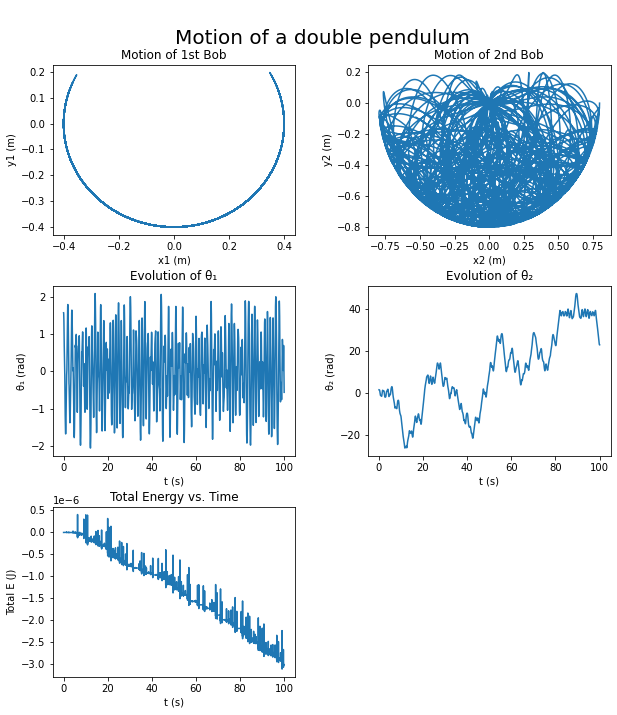

In [12]:


th10 = np.pi/2  #Initial theta_1
th20 = np.pi/2  #Initial theta_2

# angular velocities
w10 = 0         #Initial omega_1
w20 = 0         #Initial omega_2

double_pendulum(th10, th20, w10, w20)

<center><b>Case 2: Changing theta_1 = pi/3</b></center>


Initial Conditions
(θ₁, w₁) = (1.05,0)
(θ₂, w₂) = (1.57,0)

Step-size =  0.0015
Number of steps = 66667

initial totE - final totE =  3.0342e-07 J
max_totE - min_totE = 4.8485e-07 J


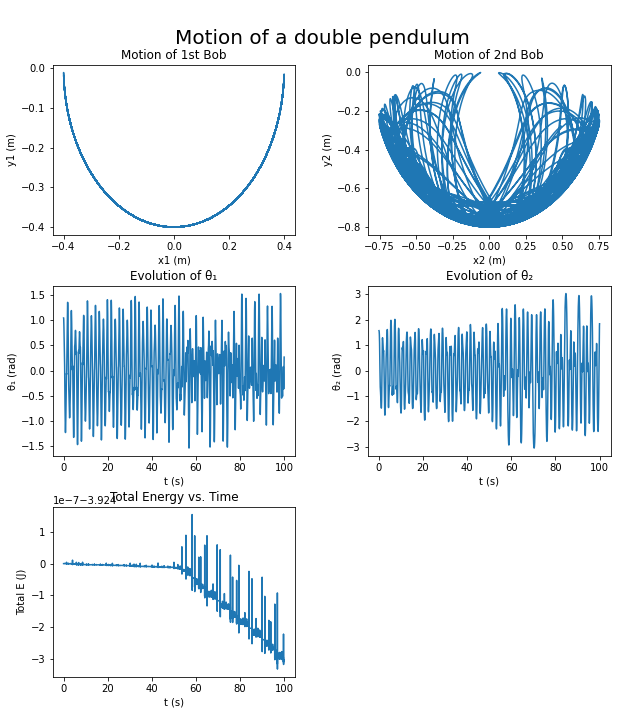

In [13]:
th10 = np.pi/3  #Initial theta_1
th20 = np.pi/2  #Initial theta_2

# angular velocities
w10 = 0         #Initial omega_1
w20 = 0         #Initial omega_2

double_pendulum(th10, th20, w10, w20)

By changing theta_1 = pi/3 keeping theta_2 = pi/2, decreases the motion of first bob along Y-axis. Also total energy remians alomst constant for first 50 seconds then it starts showing some variations. We can also observe decrease in variation in total energy compared to case 1.

<center><b>Case 3: Changing theta_2 = pi/4</b></center>


Initial Conditions
(θ₁, w₁) = (1.57,0)
(θ₂, w₂) = (0.79,0)

Step-size =  0.0015
Number of steps = 66667

initial totE - final totE =  1.5354e-06 J
max_totE - min_totE = 1.8334e-06 J


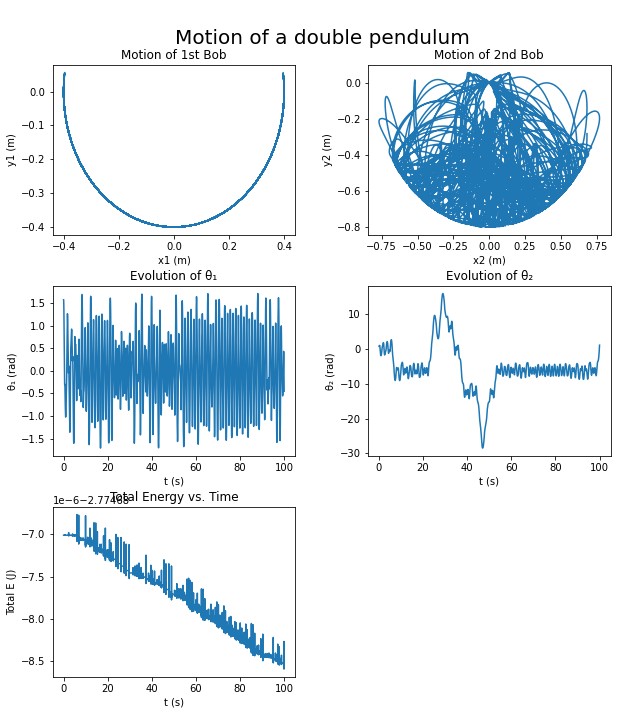

In [14]:
th10 = np.pi/2  #Initial theta_1
th20 = np.pi/4  #Initial theta_2

# angular velocities
w10 = 0         #Initial omega_1
w20 = 0         #Initial omega_2

double_pendulum(th10, th20, w10, w20)

By decreasing theta_2 from pi/2 to pi/4 while keeping theta_1 = pi/2, variation in total energy of the system almost remains the same when compared with case 1.

<center><b>Case 4: Changing theta_1 = pi/3, theta_2 = pi/4</b></center>


Initial Conditions
(θ₁, w₁) = (1.05,0)
(θ₂, w₂) = (0.79,0)

Step-size =  0.0015
Number of steps = 66667

initial totE - final totE =  2.7811e-09 J
max_totE - min_totE = 3.1780e-09 J


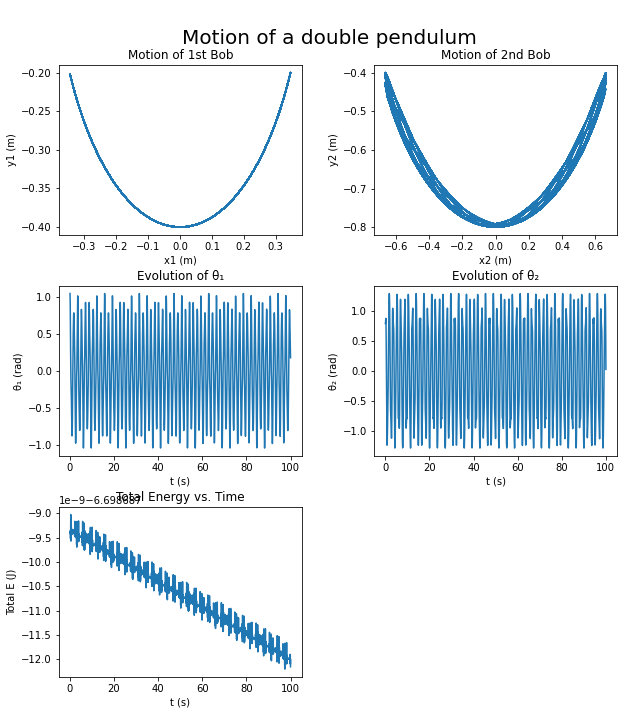

In [15]:
th10 = np.pi/3  #Initial theta_1
th20 = np.pi/4  #Initial theta_2

# angular velocities
w10 = 0         #Initial omega_1
w20 = 0         #Initial omega_2

double_pendulum(th10, th20, w10, w20)

By perturbing initial theta values of both bobs, we can see large variation in theta values with time ranging from 0 to 100 seconds. Also we can see decrease in variation of total energy compared to case 1. The noticable observation is the motion of the both the bobs is almost uniform.